In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [33]:
Aquifer_Petrignano = pd.read_csv('./datasets/Aquifer_Petrignano.csv')

In [34]:
Aquifer_Petrignano

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0     14/03/2006                    NaN                    -22.48   
1     15/03/2006                    NaN                    -22.38   
2     16/03/2006                    NaN                    -22.25   
3     17/03/2006                    NaN                    -22.38   
4     18/03/2006                    NaN                    -22.60   
...          ...                    ...                       ...   
5218  26/06/2020                    0.0                    -25.68   
5219  27/06/2020                    0.0                    -25.80   
5220  28/06/2020                    0.0                    -25.80   
5221  29/06/2020                    0.0                    -25.78   
5222  30/06/2020                    0.0                    -25.91   

      Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
0                       -22.18                       NaN   
1                       -22.14                       NaN   
2                       -22.04                       NaN   
3                       -22.04                       NaN   
4                       -22.04                       NaN   
...                        ...                       ...   
5218                    -25.07                      25.7   
5219                    -25.11                      26.2   
5220                    -25.19                      26.9   
5221                    -25.18                      26.9   
5222                    -25.25                      27.3   

      Temperature_Petrignano  Volume_C10_Petrignano  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   
...                      ...                    ...   
5218                    24.5             -29930.688   
5219                    25.0             -31332.960   
5220                    25.7             -32120.928   
5221                    26.0             -30602.880   
5222                    26.5             -31878.144   

      Hydrometry_Fiume_Chiascio_Petrignano  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
...                                    ...  
5218                                   2.5  
5219                                   2.4  
5220                                   2.4  
5221                                   2.4  
5222                                   2.4  

[5223 rows x 8 columns]

In [35]:
Aquifer_Petrignano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [36]:
Aquifer_Petrignano.shape

(5223, 8)

### Filled Entries

<AxesSubplot:>

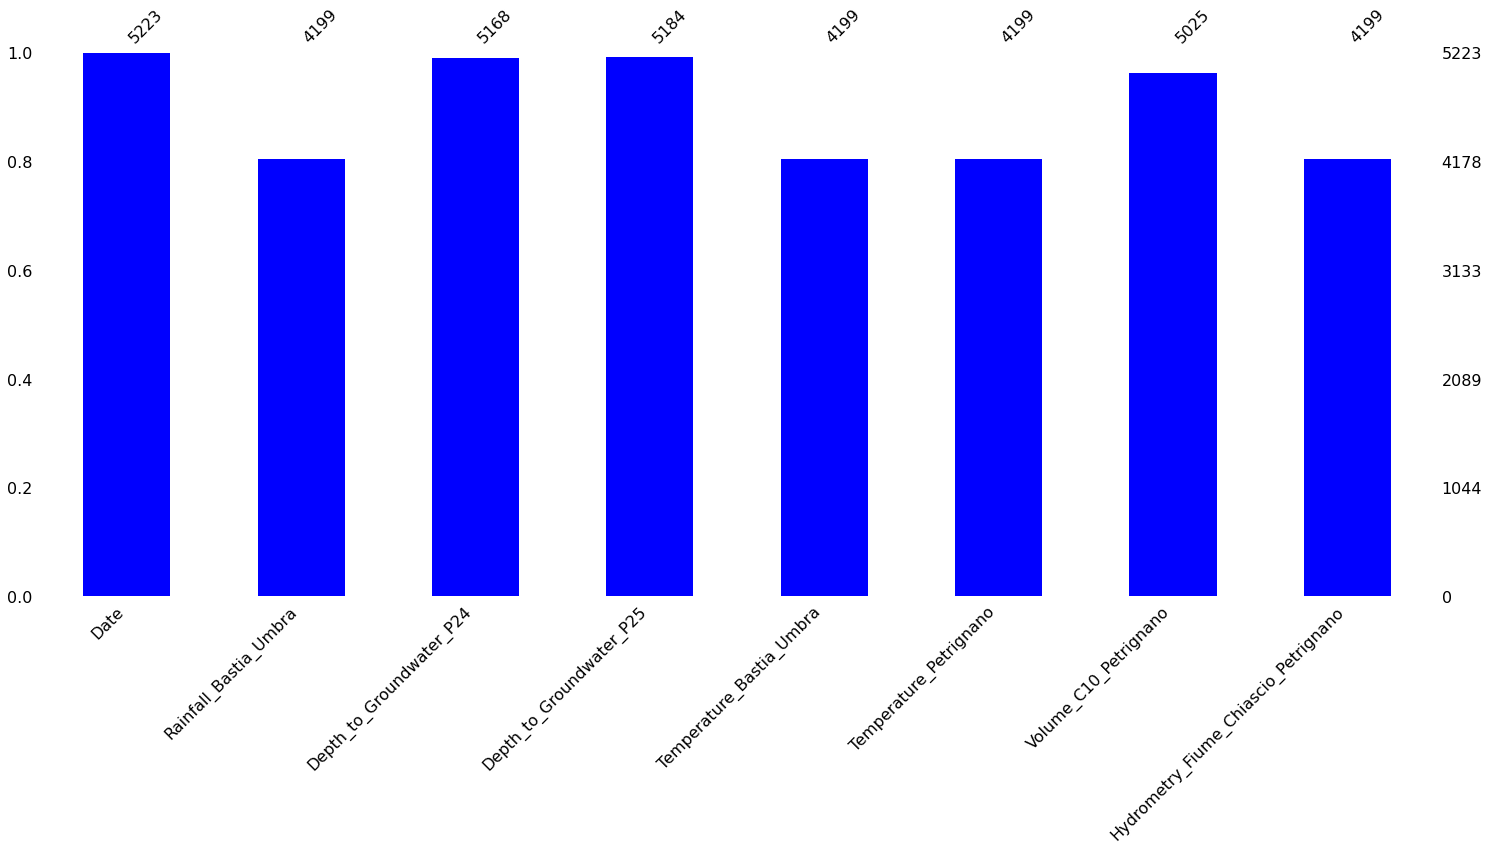

In [37]:
msno.bar(Aquifer_Petrignano,color='b')

### Dates starting and ending values

In [38]:
print('starting date:', Aquifer_Petrignano.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Petrignano.Date.values[[0,-1]][1])


starting date: 14/03/2006
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

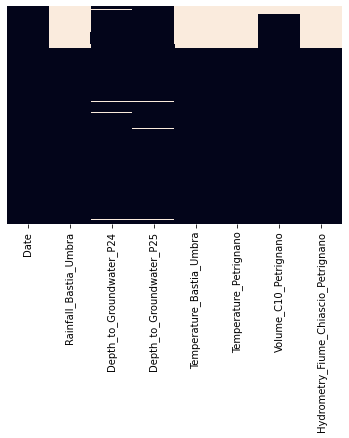

In [39]:
sns.heatmap(Aquifer_Petrignano.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

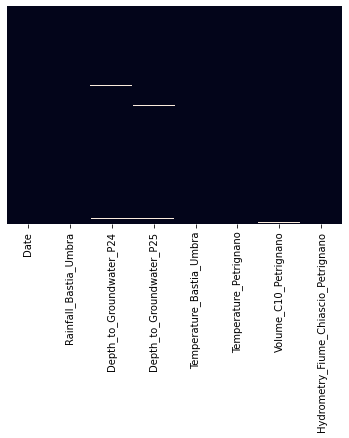

In [40]:
Aquifer_Petrignano.drop(Aquifer_Petrignano.index[0:1024], inplace=True)
sns.heatmap(Aquifer_Petrignano.isnull(),yticklabels=False,cbar=False)

In [41]:
data=Aquifer_Petrignano.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

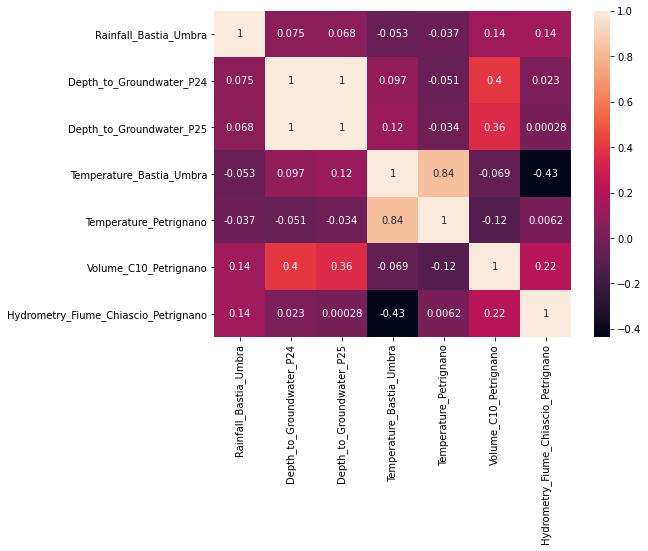

In [42]:
#sns.heatmap(data.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [43]:
features_nan=[features for features in Aquifer_Petrignano.columns if Aquifer_Petrignano[features].isnull().sum()>1 and Aquifer_Petrignano[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Petrignano[feature].isnull().mean()*100,4),'% missing ')

Depth_to_Groundwater_P24 0.9288 % missing 
Depth_to_Groundwater_P25 0.643 % missing 


In [44]:
'''
Columns that are going to be dropped



'''

'\nColumns that are going to be dropped\n\n\n\n'

In [45]:
a = Aquifer_Petrignano

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Depth_to_Groundwater_P24 0.9288 % missing 
Depth_to_Groundwater_P25 0.643 % missing 


### Imputation

In [46]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [47]:
x=a['Depth_to_Groundwater_P24']
cal(x)

null_values:  
  39 
  count_values:  
  <bound method Series.unique of -23.71    14
-27.16    13
-23.47    13
-27.13    13
-23.44    13
          ..
-33.71     1
-30.23     1
-22.64     1
-33.46     1
-30.25     1
Name: Depth_to_Groundwater_P24, Length: 1145, dtype: int64> 
  mean:  
  -25.713706730769267 
  median:  
  -25.55 
  mode:  
  0   -23.71
dtype: float64


In [48]:
a['Depth_to_Groundwater_P24']=a['Depth_to_Groundwater_P24'].fillna(a['Depth_to_Groundwater_P24'].mean())

Depth_to_Groundwater_P25

In [49]:
x=a['Depth_to_Groundwater_P25']
cal(x)

null_values:  
  27 
  count_values:  
  <bound method Series.unique of -26.45    17
-26.38    15
-28.61    15
-26.46    14
-23.38    14
          ..
-23.12     1
-19.68     1
-30.85     1
-31.26     1
-20.04     1
Name: Depth_to_Groundwater_P25, Length: 1142, dtype: int64> 
  mean:  
  -25.18253355704689 
  median:  
  -25.17 
  mode:  
  0   -26.45
dtype: float64


In [50]:
a['Depth_to_Groundwater_P25']=a['Depth_to_Groundwater_P25'].fillna(a['Depth_to_Groundwater_P25'].mean())

Volume_C10_Petrignano

In [51]:
x=a['Volume_C10_Petrignano']
cal(x)

null_values:  
  1 
  count_values:  
  <bound method Series.unique of  0.000        25
-26127.360     4
-27076.032     4
-26257.824     3
-29742.336     3
              ..
-28571.616     1
-29485.728     1
-23775.552     1
-27097.632     1
-29217.888     1
Name: Volume_C10_Petrignano, Length: 3669, dtype: int64> 
  mean:  
  -28669.156619342506 
  median:  
  -28389.744 
  mode:  
  0    0.0
dtype: float64


In [52]:
a['Volume_C10_Petrignano']=a['Volume_C10_Petrignano'].fillna(a['Volume_C10_Petrignano'].median())

In [53]:
a.isnull().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

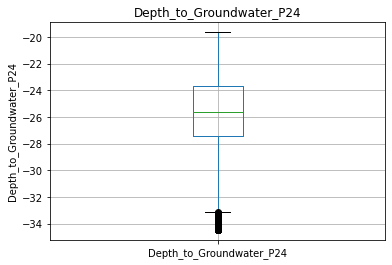

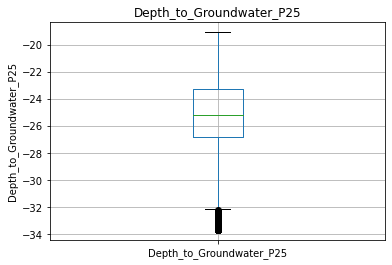

In [54]:
a = a.drop(['Date'],axis=1)
a

for feature in a.columns:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [55]:
q1 = a['Depth_to_Groundwater_P24'].quantile(0.25)
q3 = a['Depth_to_Groundwater_P24'].quantile(0.75)

IQR = q3-q1

lower_extreme = q1 - 1.5*IQR
upper_extreme = q3 + 1.5*IQR

out1= a[(a['Depth_to_Groundwater_P24']<lower_extreme)].values
out2= a[(a['Depth_to_Groundwater_P24']>upper_extreme)].values

mean = a['Depth_to_Groundwater_P24'].mean()



a['Depth_to_Groundwater_P24'].replace(out1,lower_extreme,inplace=True)
a['Depth_to_Groundwater_P24'].replace(out2,upper_extreme,inplace=True)

# out = a[(a['Depth_to_Groundwater_P24']<lower_extreme)|(a['Depth_to_Groundwater_P24']>upper_extreme)].index

# a.drop(out,inplace=True)

q11 = a['Depth_to_Groundwater_P25'].quantile(0.25)
q31 = a['Depth_to_Groundwater_P25'].quantile(0.75)

IQR2 = q31-q11

lower_extreme1 = q11 - 1.5*IQR
upper_extreme1 = q31 + 1.5*IQR

# out1= a[(a['Depth_to_Groundwater_Pozzo_2']<lower_extreme)].values
# out2= a[(a['Depth_to_Groundwater_Pozzo_2']>upper_extreme)].values

# mean = a['Depth_to_Groundwater_Pozzo_2'].mean()



# a['Depth_to_Groundwater_Pozzo_2'].replace(out1,lower_extreme,inplace=True)
# a['Depth_to_Groundwater_Pozzo_2'].replace(out2,upper_extreme,inplace=True)

out = a[(a['Depth_to_Groundwater_P25']<lower_extreme1)|(a['Depth_to_Groundwater_P25']>upper_extreme1)].index

a.drop(out,inplace=True)


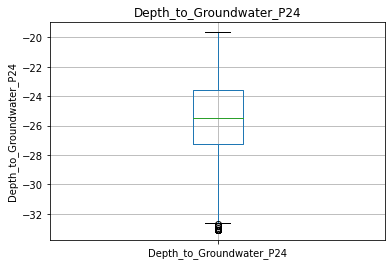

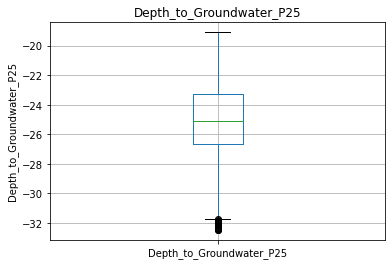

In [56]:
for feature in a.columns:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [57]:
q1 = a['Depth_to_Groundwater_P25'].quantile(0.25)
q3 = a['Depth_to_Groundwater_P25'].quantile(0.75)

IQR = q3-q1

lower_extreme = q1 - 1.5*IQR
upper_extreme = q3 + 1.5*IQR

# out1= a[(a['Depth_to_Groundwater_Pozzo_2']<lower_extreme)].values
# out2= a[(a['Depth_to_Groundwater_Pozzo_2']>upper_extreme)].values

# mean = a['Depth_to_Groundwater_Pozzo_2'].mean()



# a['Depth_to_Groundwater_Pozzo_2'].replace(out1,lower_extreme,inplace=True)
# a['Depth_to_Groundwater_Pozzo_2'].replace(out2,upper_extreme,inplace=True)

out = a[(a['Depth_to_Groundwater_P25']<lower_extreme)|(a['Depth_to_Groundwater_P25']>upper_extreme)].index

a.drop(out,inplace=True)


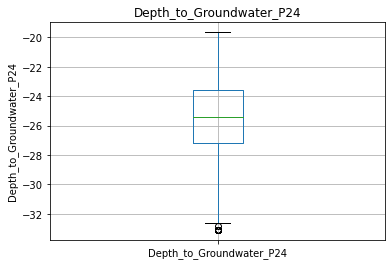

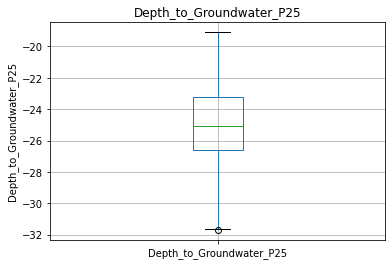

In [58]:
for feature in a.columns:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [59]:
a

Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
1024                    0.0                    -31.96   
1025                    0.0                    -32.03   
1026                    0.0                    -31.97   
1027                    0.0                    -31.91   
1028                    0.0                    -31.94   
...                     ...                       ...   
5218                    0.0                    -25.68   
5219                    0.0                    -25.80   
5220                    0.0                    -25.80   
5221                    0.0                    -25.78   
5222                    0.0                    -25.91   

      Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
1024                    -31.14                       5.2   
1025                    -31.11                       2.3   
1026                    -31.07                       4.4   
1027                    -31.05                       0.8   
1028                    -31.01                      -1.9   
...                        ...                       ...   
5218                    -25.07                      25.7   
5219                    -25.11                      26.2   
5220                    -25.19                      26.9   
5221                    -25.18                      26.9   
5222                    -25.25                      27.3   

      Temperature_Petrignano  Volume_C10_Petrignano  \
1024                     4.9             -24530.688   
1025                     2.5             -28785.888   
1026                     3.9             -25766.208   
1027                     0.8             -27919.296   
1028                    -2.1             -29854.656   
...                      ...                    ...   
5218                    24.5             -29930.688   
5219                    25.0             -31332.960   
5220                    25.7             -32120.928   
5221                    26.0             -30602.880   
5222                    26.5             -31878.144   

      Hydrometry_Fiume_Chiascio_Petrignano  
1024                                   2.4  
1025                                   2.5  
1026                                   2.4  
1027                                   2.4  
1028                                   2.3  
...                                    ...  
5218                                   2.5  
5219                                   2.4  
5220                                   2.4  
5221                                   2.4  
5222                                   2.4  

[4062 rows x 7 columns]

In [60]:
from sklearn.preprocessing import Normalizer
scale = Normalizer()
dataset = scale.fit_transform(a)
df = pd.DataFrame(dataset)
clms = a.columns
df.columns = clms
df

Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0                       0.0                 -0.001303   
1                       0.0                 -0.001113   
2                       0.0                 -0.001241   
3                       0.0                 -0.001143   
4                       0.0                 -0.001070   
...                     ...                       ...   
4057                    0.0                 -0.000858   
4058                    0.0                 -0.000823   
4059                    0.0                 -0.000803   
4060                    0.0                 -0.000842   
4061                    0.0                 -0.000813   

      Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
0                    -0.001269                  0.000212   
1                    -0.001081                  0.000080   
2                    -0.001206                  0.000171   
3                    -0.001112                  0.000029   
4                    -0.001039                 -0.000064   
...                        ...                       ...   
4057                 -0.000838                  0.000859   
4058                 -0.000801                  0.000836   
4059                 -0.000784                  0.000837   
4060                 -0.000823                  0.000879   
4061                 -0.000792                  0.000856   

      Temperature_Petrignano  Volume_C10_Petrignano  \
0                   0.000200              -0.999998   
1                   0.000087              -0.999999   
2                   0.000151              -0.999998   
3                   0.000029              -0.999999   
4                  -0.000070              -0.999999   
...                      ...                    ...   
4057                0.000819              -0.999999   
4058                0.000798              -0.999999   
4059                0.000800              -0.999999   
4060                0.000850              -0.999999   
4061                0.000831              -0.999999   

      Hydrometry_Fiume_Chiascio_Petrignano  
0                                 0.000098  
1                                 0.000087  
2                                 0.000093  
3                                 0.000086  
4                                 0.000077  
...                                    ...  
4057                              0.000084  
4058                              0.000077  
4059                              0.000075  
4060                              0.000078  
4061                              0.000075  

[4062 rows x 7 columns]

In [63]:
#pd.DataFrame.to_csv(a,'./new_datasets/Aquifer_Petrignano.csv',index=False)
pd.DataFrame.to_csv(df,'./new_datasets/Aquifer_Petrignano_scaled.csv',index=False)